In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/helmet")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/helmet


In [4]:
# Install the YOLOv8/YOLO11 library
!pip install ultralytics
import os
from ultralytics import YOLO
from IPython.display import Image, display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.4 MB/s eta 0:00:00a 0:00:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
import yaml

# CONFIGURATION: Change these to match your specific folder names in /kaggle/input
# Tip: Look at the "Data" sidebar on the right in Kaggle to copy the exact path
dataset_root = '//kaggle/input/helmet' 

# Create a dictionary for the data.yaml content
data_yaml_content = {
    'train': os.path.join(dataset_root, 'train/images'),
    'val': os.path.join(dataset_root, 'valid/images'),
    'test': os.path.join(dataset_root, 'test/images'),
    
    # These must match the number of classes in your dataset
    'nc': 2, 
    'names': ['Helmet', 'No-Helmet'] 
}

# Save this file to the working directory (which is writable)
with open('/kaggle/working/data.yaml', 'w') as f:
    yaml.dump(data_yaml_content, f)

print("data.yaml created successfully at /kaggle/working/data.yaml")

data.yaml created successfully at /kaggle/working/data.yaml


In [6]:
import yaml
import os

# --- ⚠️ CHANGE THIS LINE ⚠️ ---
# Paste the actual folder name you found in Step 2.
# Example: dataset_dir_name = 'helmet-detection-dataset'
dataset_dir_name = '/kaggle/input/helmet' 
# ------------------------------

base_path = f'/kaggle/input/{dataset_dir_name}'

# Auto-detect if the validation folder is named 'val' or 'valid'
# This prevents errors if your dataset uses different naming conventions
val_folder = 'valid' if os.path.exists(os.path.join(base_path, 'valid')) else 'val'

data_yaml_content = {
    'train': os.path.join(base_path, 'train/images'),
    'val': os.path.join(base_path, f'{val_folder}/images'), # Uses the detected name
    'test': os.path.join(base_path, 'test/images'),
    'nc': 2,
    'names': ['Helmet', 'No-Helmet']
}

# Write the new data.yaml
with open('/kaggle/working/data.yaml', 'w') as f:
    yaml.dump(data_yaml_content, f)

print(f"fixed data.yaml created! \nTrain path: {data_yaml_content['train']}")

fixed data.yaml created! 
Train path: /kaggle/input//kaggle/input/helmet/train/images


In [7]:
import os
import yaml

# 1. Define your base path
base_path = '/kaggle/input/helmet'

# 2. Automatically find if the validation folder is named "val" or "valid"
# (This prevents the common "missing path" error)
if os.path.exists(os.path.join(base_path, 'valid')):
    val_dir = 'valid'
elif os.path.exists(os.path.join(base_path, 'val')):
    val_dir = 'val'
else:
    # Fallback: Look inside subfolders if dataset is nested
    print("Warning: Standard folders not found. Listing content:")
    print(os.listdir(base_path))
    val_dir = 'valid' # Defaulting, might need manual adjustment if nested

print(f"Detected validation folder name: {val_dir}")

# 3. Create the configuration dictionary
data_yaml_content = {
    'train': os.path.join(base_path, 'train/images'),
    'val': os.path.join(base_path, val_dir, 'images'),
    'test': os.path.join(base_path, 'test/images'), # Optional
    'nc': 2,
    'names': ['Helmet', 'No-Helmet']
}

# 4. Save to the writable working directory
with open('/kaggle/working/data.yaml', 'w') as f:
    yaml.dump(data_yaml_content, f)

print("\nSUCCESS: /kaggle/working/data.yaml has been created!")
print(f"Train path set to: {data_yaml_content['train']}")

['HelmetViolationsV2', '22.mp4', 'best.pt', 'HelmetViolations']
Detected validation folder name: valid

SUCCESS: /kaggle/working/data.yaml has been created!
Train path set to: /kaggle/input/helmet/train/images


In [8]:
import os
import yaml

# 1. We know the root is here
root = '/kaggle/input/helmet'

# 2. Check which subfolder actually contains the 'train' data
# We check both 'HelmetViolations' and 'HelmetViolationsV2'
possible_subfolders = ['HelmetViolations', 'HelmetViolationsV2']
dataset_folder = None

for sub in possible_subfolders:
    # We look for the 'train' folder inside
    test_path = os.path.join(root, sub, 'train')
    if os.path.exists(test_path):
        dataset_folder = os.path.join(root, sub)
        print(f"✅ Found dataset in: {dataset_folder}")
        break

if not dataset_folder:
    print("❌ Could not find a 'train' folder in either subfolder. Please check manually.")
else:
    # 3. Handle 'valid' vs 'val' naming
    val_dir = 'valid' if os.path.exists(os.path.join(dataset_folder, 'valid')) else 'val'
    
    # 4. Create the CORRECT data.yaml
    data_yaml_content = {
        'train': os.path.join(dataset_folder, 'train/images'),
        'val': os.path.join(dataset_folder, val_dir, 'images'),
        'test': os.path.join(dataset_folder, 'test/images'),
        'nc': 2,
        'names': ['Helmet', 'No-Helmet']
    }

    with open('/kaggle/working/data.yaml', 'w') as f:
        yaml.dump(data_yaml_content, f)

    print("\nSUCCESS! New data.yaml created.")
    print(f"Training path is set to: {data_yaml_content['train']}")

✅ Found dataset in: /kaggle/input/helmet/HelmetViolations

SUCCESS! New data.yaml created.
Training path is set to: /kaggle/input/helmet/HelmetViolations/train/images


In [9]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt') 

results = model.train(
    data='/kaggle/working/data.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    project='helmet_project',
    name='try_1'
)

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=try_1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

In [10]:
import os

print("--- SCANNING FOR TRAINING RESULTS ---")
found_results = False
found_weights = False

# Walk through the entire working directory
for root, dirs, files in os.walk('/kaggle/working'):
    for file in files:
        # Check for the results graph
        if file == 'results.png':
            print(f"✅ Found Results Graph: {os.path.join(root, file)}")
            found_results = True
        
        # Check for the model weights (proof training worked)
        if file == 'best.pt':
            print(f"✅ Found Model Weights: {os.path.join(root, file)}")
            found_weights = True

if not found_results and not found_weights:
    print("❌ No training results found. The training likely crashed or didn't start.")
    print("\n--- Listing All Folders (to help debug) ---")
    for root, dirs, files in os.walk('/kaggle/working'):
        print(f"Folder: {root}")

--- SCANNING FOR TRAINING RESULTS ---
✅ Found Results Graph: /kaggle/working/runs/detect/helmet_project/try_1/results.png
✅ Found Model Weights: /kaggle/working/runs/detect/helmet_project/try_1/weights/best.pt


--- Training Metrics ---


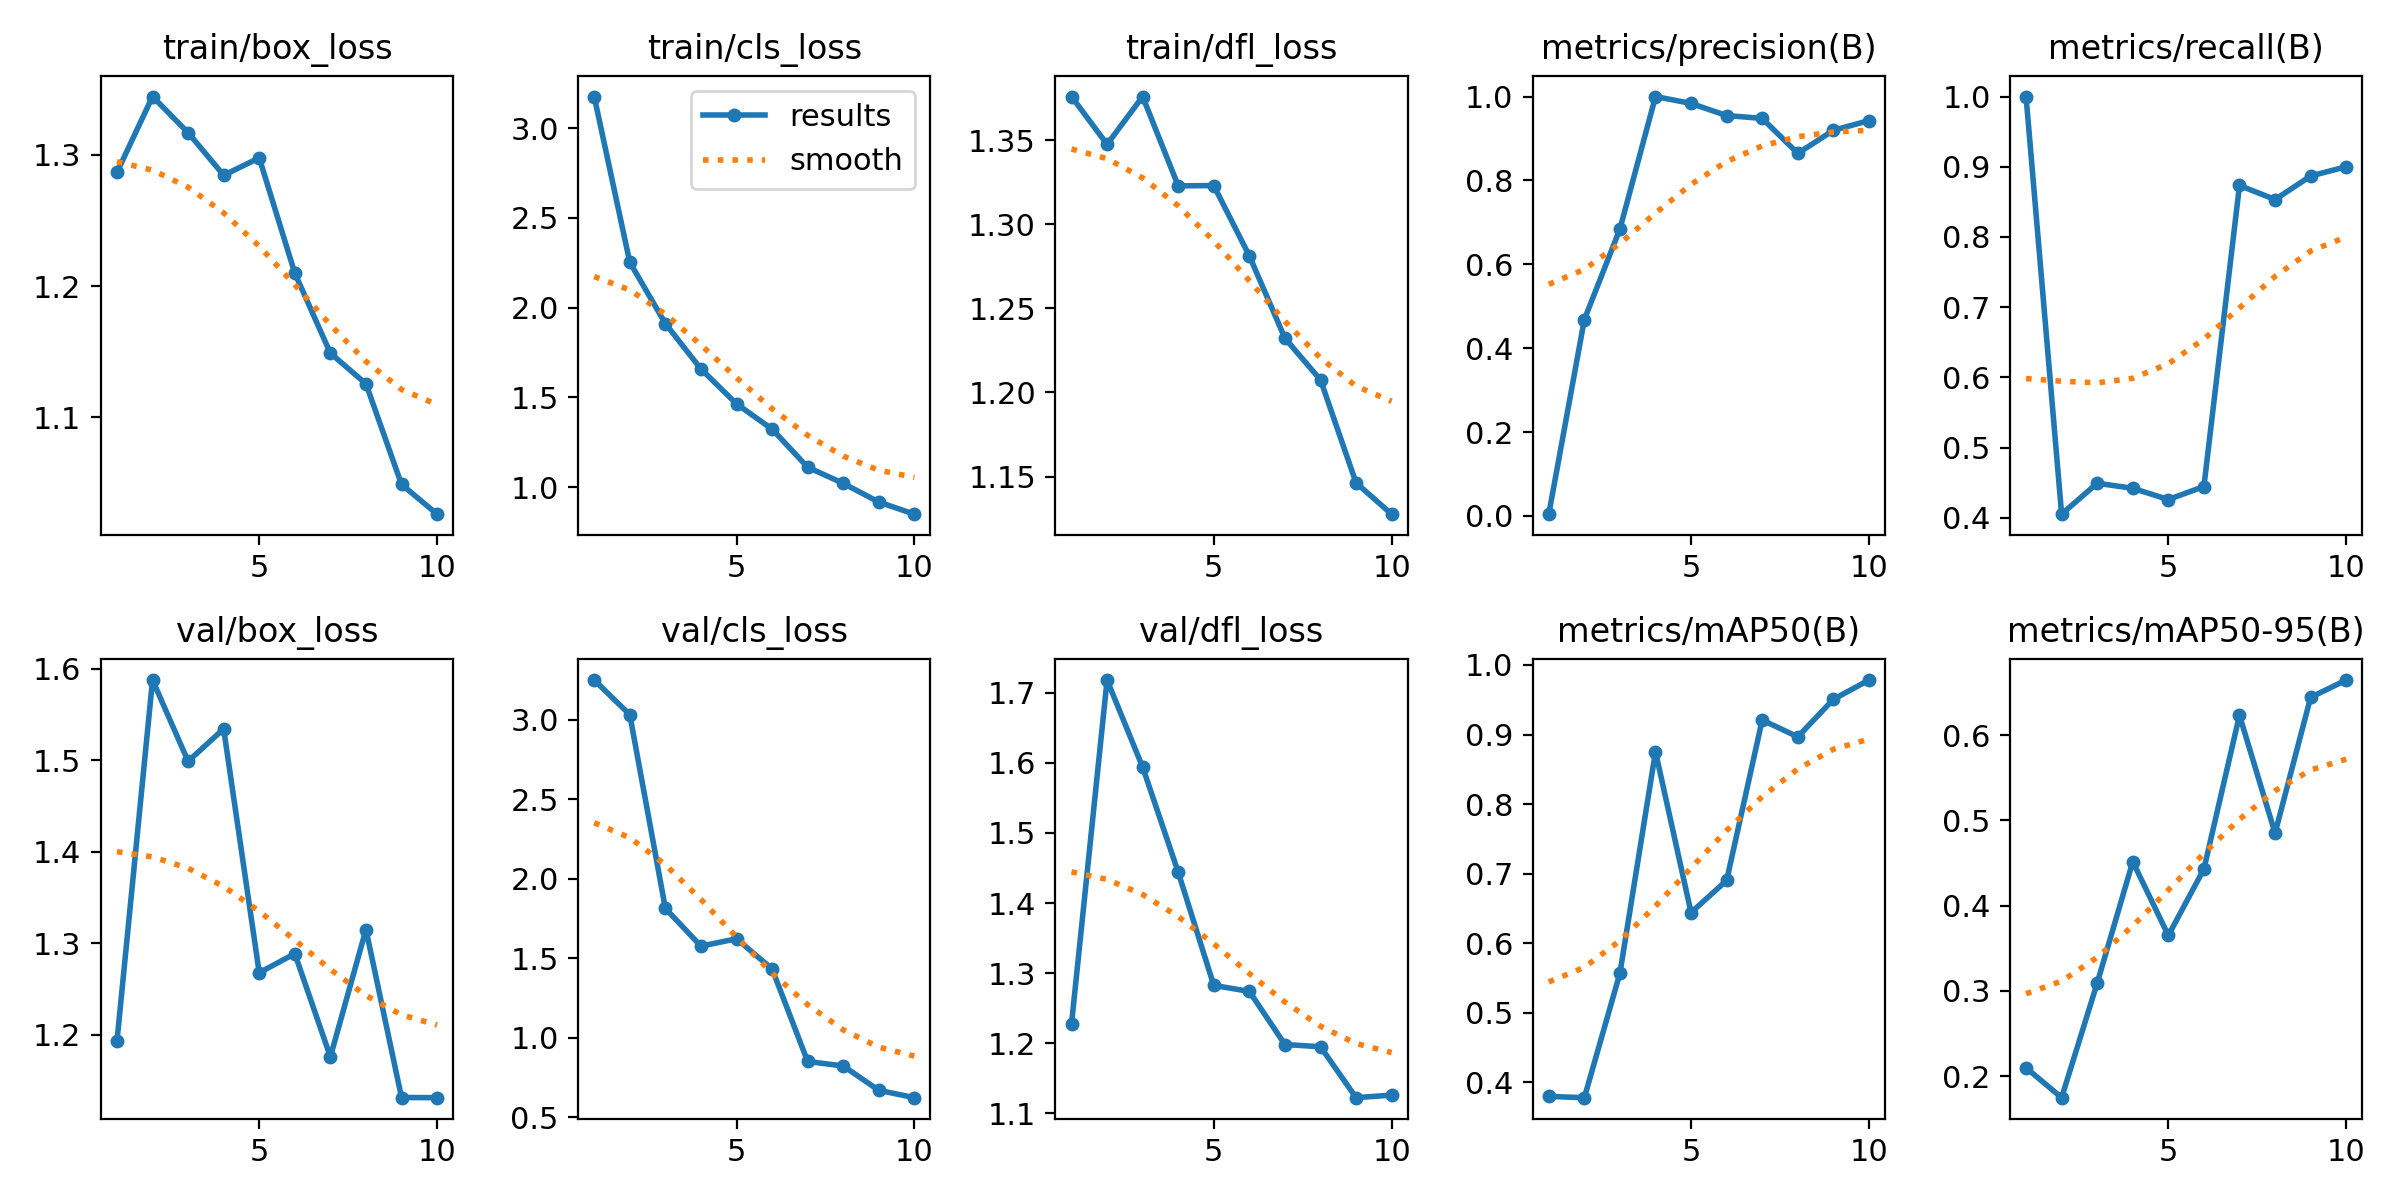


--- Validation Batch (What the model 'sees') ---


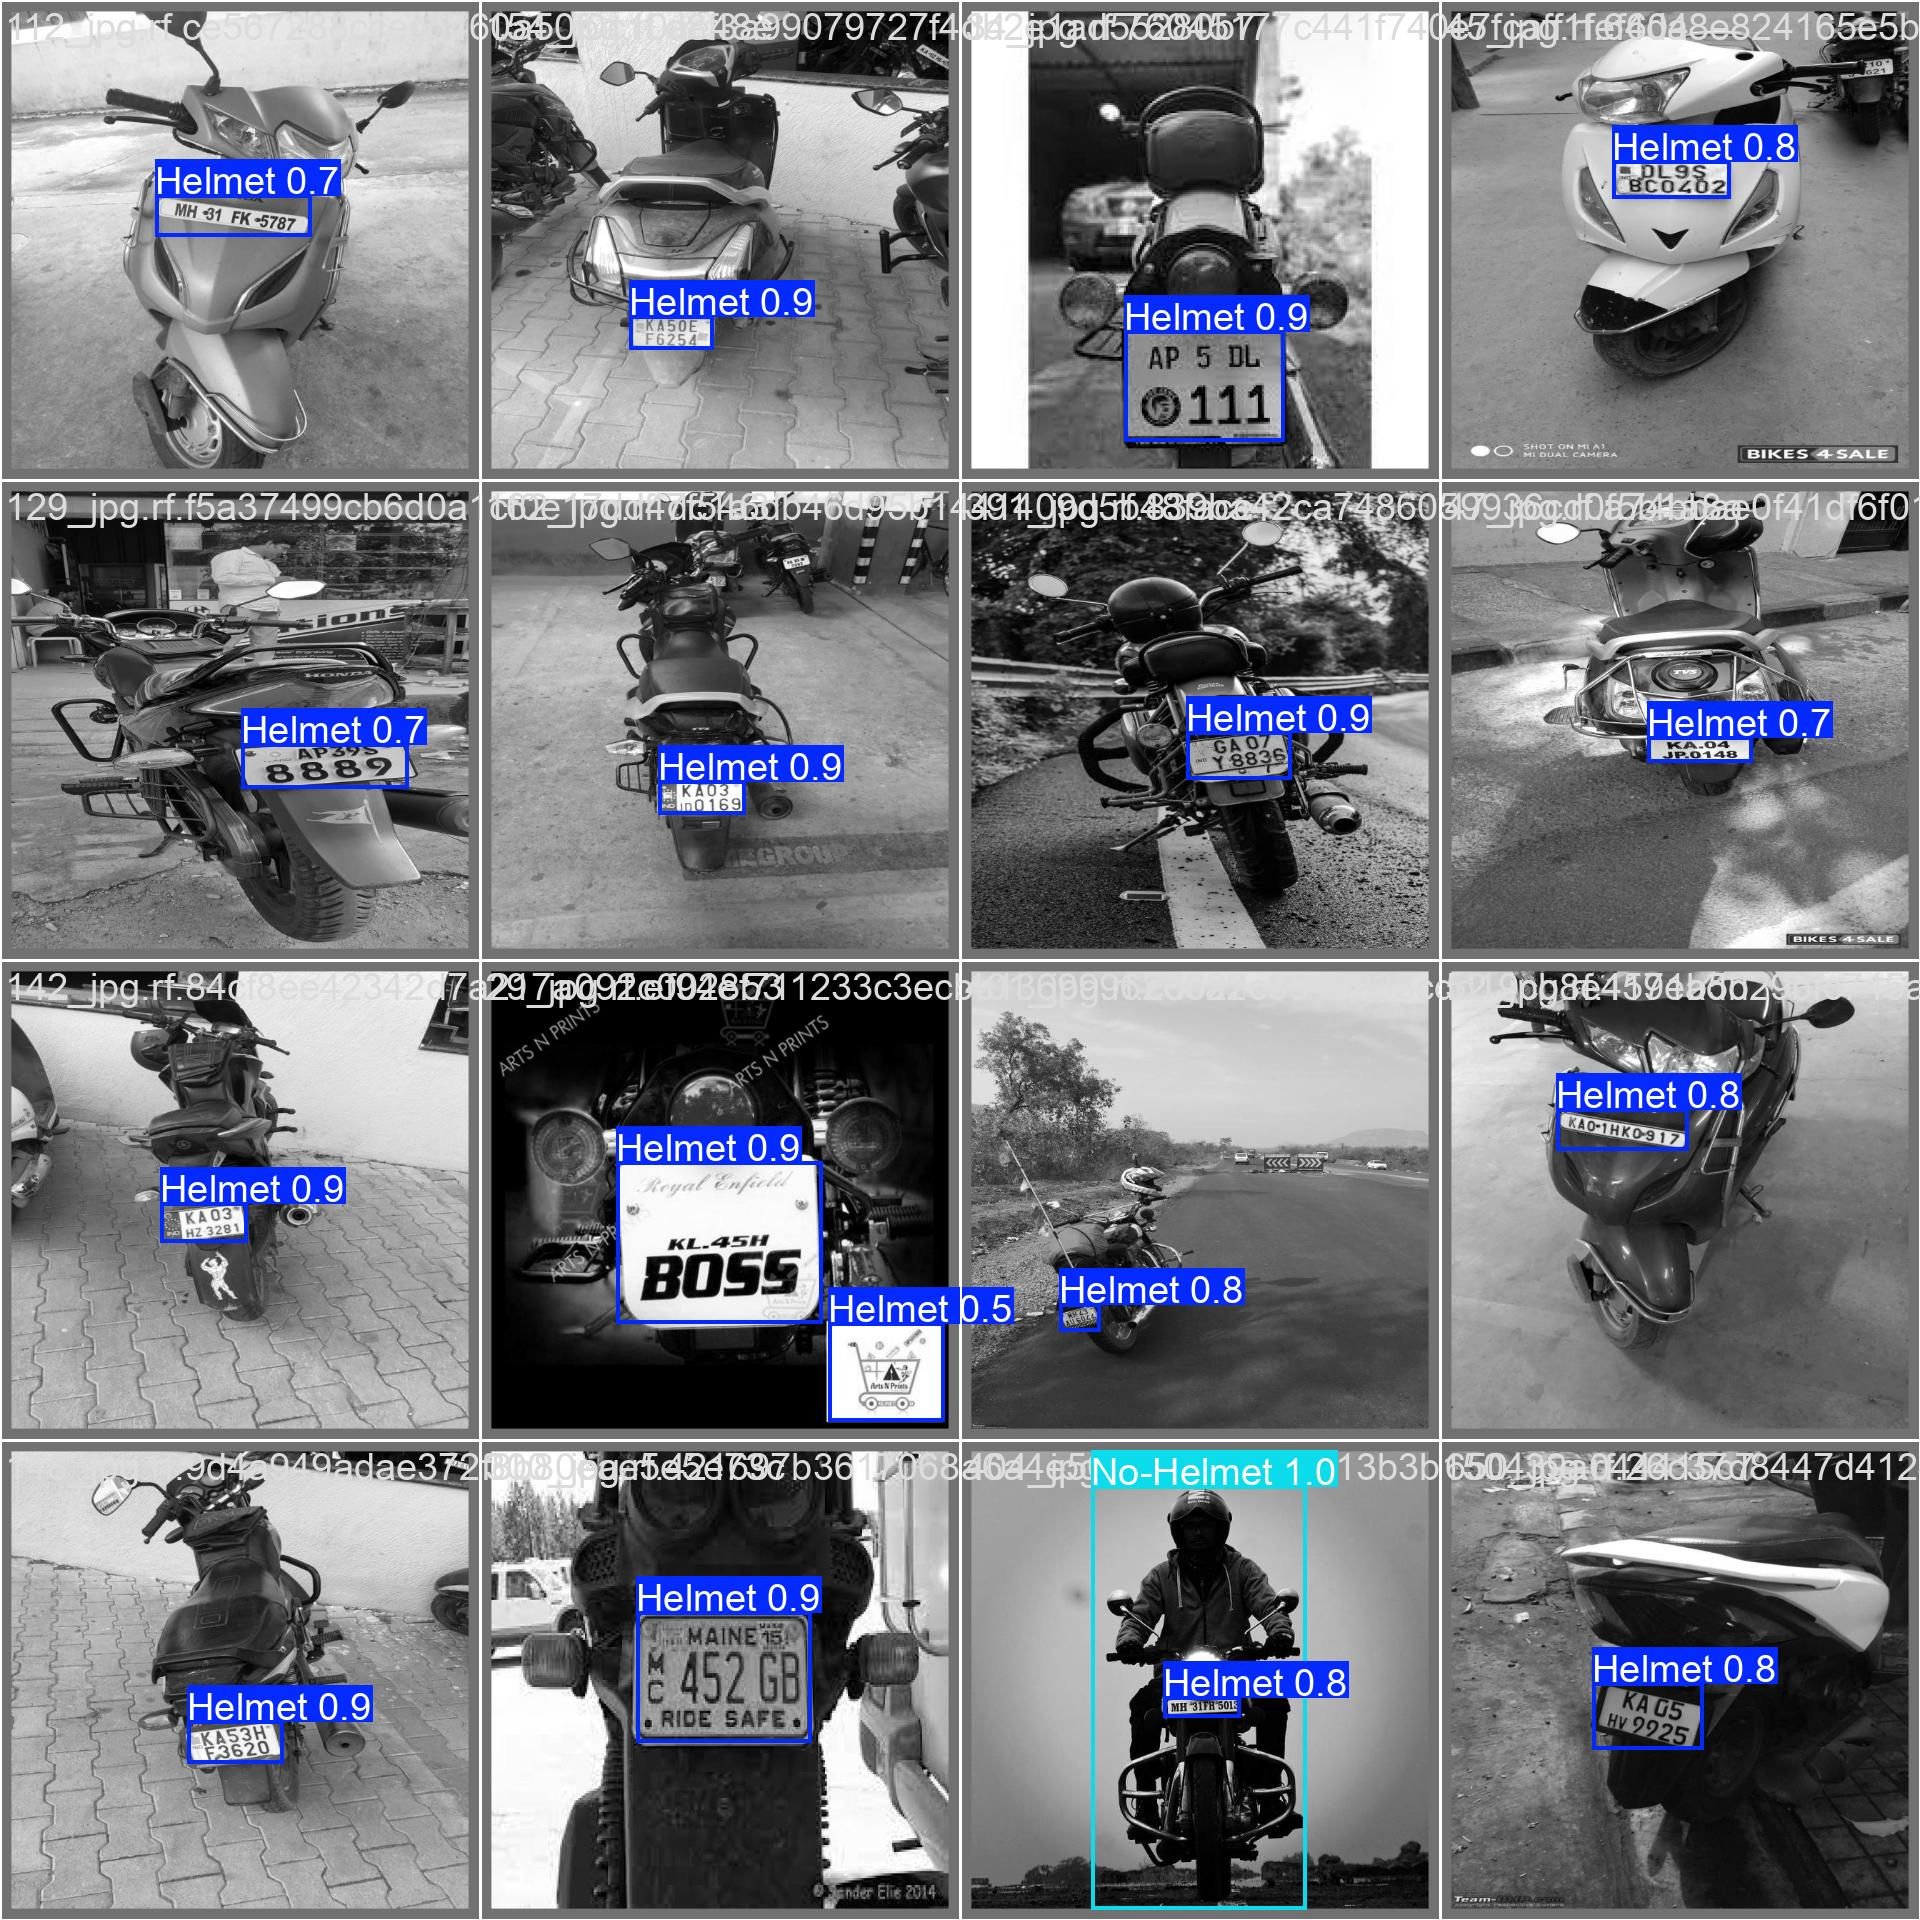

In [11]:
from IPython.display import Image, display

# The CORRECT path found by your scan
run_folder = '/kaggle/working/runs/detect/helmet_project/try_1'

print("--- Training Metrics ---")
# This graph shows if the model is getting smarter (loss going down)
display(Image(filename=f'{run_folder}/results.png'))

print("\n--- Validation Batch (What the model 'sees') ---")
# This shows sample detections on data it used to test itself
# Note: YOLO sometimes names this 'val_batch0_labels.jpg' or 'val_batch0_pred.jpg'
try:
    display(Image(filename=f'{run_folder}/val_batch0_pred.jpg'))
except FileNotFoundError:
    print("Prediction image not found (filename might vary slightly).")

In [12]:
from ultralytics import YOLO
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt

# 1. Load the model using the FOUND weights path
model_path = '/kaggle/working/runs/detect/helmet_project/try_1/weights/best.pt'
model = YOLO(model_path)

# 2. Define path to test images (using the path we confirmed earlier)
# We will use the 'test' folder from your dataset
test_images_path = '/kaggle/input/helmet/HelmetViolations/test/images'
if not os.path.exists(test_images_path):
    test_images_path = '/kaggle/input/helmet/HelmetViolationsV2/test/images'

# 3. Initialize Data Log
violation_log = []

# 4. Get list of images
image_files = [f for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.png'))]
# Let's process just 5 images to start
image_files = image_files[:5]

print(f"🚀 Model loaded! Processing {len(image_files)} images...\n")

for img_file in image_files:
    full_path = os.path.join(test_images_path, img_file)
    
    # Run YOLO inference
    results = model.predict(full_path, conf=0.4, verbose=False) 
    result = results[0]
    
    violation_detected = False
    
    # Check detections
    for box in result.boxes:
        cls_id = int(box.cls[0])
        class_name = result.names[cls_id]
        
        # LOGIC: If 'No-Helmet' is found -> It's a violation
        # (Double check: In your data.yaml, is 'No-Helmet' definitely one of the classes?)
        if class_name == 'No-Helmet':
            violation_detected = True
            
            violation_log.append({
                'Image': img_file,
                'Violation': 'No Helmet',
                'Confidence': f"{float(box.conf[0]):.2f}",
                'Action': 'Needs Number Plate OCR' 
            })

    # Show result ONLY if violation found
    if violation_detected:
        print(f"🚨 VIOLATION DETECTED in: {img_file}")
        
        # Draw the boxes using YOLO's built-in plotter
        plotted_img = result.plot()
        
        # Display using Matplotlib
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(plotted_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

# 5. Create Excel Report
if violation_log:
    df = pd.DataFrame(violation_log)
    df.to_excel('violation_report.xlsx', index=False)
    print("\n✅ Excel Report Generated: 'violation_report.xlsx'")
    print(df)
else:
    print("\n✅ No violations found in these 5 images (or class names didn't match).")

🚀 Model loaded! Processing 5 images...


✅ No violations found in these 5 images (or class names didn't match).


In [13]:
from ultralytics import YOLO
import os

# 1. Load Model
model_path = '/kaggle/working/runs/detect/helmet_project/try_1/weights/best.pt'
model = YOLO(model_path)

# 2. PRINT THE CLASS NAMES (This is the key!)
print(f"📋 Model Class Names: {model.names}")

# 3. Test on images again
test_images_path = '/kaggle/input/helmet/HelmetViolations/test/images'
if not os.path.exists(test_images_path):
    test_images_path = '/kaggle/input/helmet/HelmetViolationsV2/test/images'

image_files = [f for f in os.listdir(test_images_path) if f.endswith('.jpg')][:3]

print(f"\nScanning {len(image_files)} images (Confidence > 0.1)...")

for img_file in image_files:
    full_path = os.path.join(test_images_path, img_file)
    
    # Run with very low confidence just to see EVERYTHING
    results = model.predict(full_path, conf=0.1, verbose=False)
    
    # Print what was found
    if len(results[0].boxes) > 0:
        print(f"\n📸 Image: {img_file}")
        for box in results[0].boxes:
            cls_id = int(box.cls[0])
            name = results[0].names[cls_id]
            conf = float(box.conf[0])
            print(f"   -> Found: '{name}' (Confidence: {conf:.2f})")
    else:
        print(f"\n📸 Image: {img_file} - Nothing detected.")

📋 Model Class Names: {0: 'Helmet', 1: 'No-Helmet'}

Scanning 3 images (Confidence > 0.1)...

📸 Image: 64_jpg.rf.00667cc3498fb390420641525f8cc8cb.jpg
   -> Found: 'Helmet' (Confidence: 0.89)

📸 Image: 73_jpg.rf.bdc6efc3fd87c2488c3217fe817a3771.jpg
   -> Found: 'Helmet' (Confidence: 0.85)

📸 Image: 340_jpg.rf.7a47ebce85bfd401da688f75d3d7dcf7.jpg
   -> Found: 'Helmet' (Confidence: 0.84)


In [14]:
!pip install easyocr

In [15]:
from ultralytics import YOLO
import cv2
import easyocr
import pandas as pd
import os
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
model_path = '/kaggle/working/runs/detect/helmet_project/try_1/weights/best.pt'
test_images_path = '/kaggle/input/helmet/HelmetViolations/test/images'
if not os.path.exists(test_images_path):
    test_images_path = '/kaggle/input/helmet/HelmetViolationsV2/test/images'

# 1. Initialize Tools
print("⏳ Loading YOLO model and OCR reader... (This takes 10s)")
model = YOLO(model_path)
reader = easyocr.Reader(['en']) # Load English OCR
print("✅ System Ready!")

# 2. Setup Logging
violation_log = []
max_images_to_check = 50 # Check more images to ensure we find a violation!

# 3. Get Images
image_files = [f for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.png'))]
print(f"📂 Found {len(image_files)} images. Scanning the first {max_images_to_check} for violations...\n")

# 4. Processing Loop
for i, img_file in enumerate(image_files[:max_images_to_check]):
    full_path = os.path.join(test_images_path, img_file)
    
    # Run Detection
    results = model.predict(full_path, conf=0.5, verbose=False)
    result = results[0]
    
    violation_found = False
    
    # Check for "No-Helmet" class
    for box in result.boxes:
        cls_id = int(box.cls[0])
        class_name = result.names[cls_id]
        
        if class_name == 'No-Helmet':
            violation_found = True
            
            # --- VIOLATION LOGIC ---
            print(f"🚨 VIOLATION DETECTED in {img_file}")
            
            # A. Load Image for OCR
            img = cv2.imread(full_path)
            height, width, _ = img.shape
            
            # B. OCR Strategy: Scan the bottom half of the image (where plates usually are)
            # Cropping: [y:y+h, x:x+w]
            plate_region = img[int(height/2):height, 0:width] 
            
            # C. Read Text
            ocr_result = reader.readtext(plate_region)
            
            # Extract text (if any found)
            detected_text = "Unknown"
            if len(ocr_result) > 0:
                # Get the text with highest confidence
                detected_text = ocr_result[0][1]
                print(f"   🔍 Potential Number Plate: {detected_text}")
            else:
                print("   ⚠️ No clear text found (Image might be blurry)")

            # D. Log to Database
            violation_log.append({
                'Filename': img_file,
                'Violation Type': 'No Helmet',
                'Confidence': f"{float(box.conf[0]):.2f}",
                'Detected NumberPlate': detected_text
            })

            # E. Show Proof
            plt.figure(figsize=(5, 5))
            plt.imshow(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))
            plt.title(f"Violation: {detected_text}")
            plt.axis('off')
            plt.show()
            
            # Stop checking this image (we found the violation)
            break 

# 5. Save Final Report
if len(violation_log) > 0:
    df = pd.DataFrame(violation_log)
    df.to_excel('Traffic_Violations.xlsx', index=False)
    print("\n✅ SUCCESS: 'Traffic_Violations.xlsx' has been created.")
    display(df)
else:
    print("\n✅ Scan complete. No violations found in this batch. (Try increasing max_images_to_check)")

⏳ Loading YOLO model and OCR reader... (This takes 10s)
✅ System Ready!
📂 Found 7 images. Scanning the first 50 for violations...


✅ Scan complete. No violations found in this batch. (Try increasing max_images_to_check)


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aneesarom/rider-with-helmet-without-helmet-number-plate")

print("Path to dataset files:", path)

In [ ]:
import os
import yaml

# 1. Your NEW Dataset Path
root = '/kaggle/input/rider-with-helmet-without-helmet-number-plate'

# 2. Inspect folder structure to find 'train'
# We search recursively because sometimes datasets are nested like "dataset/dataset/train"
train_dir = None
val_dir = None

for dirpath, dirnames, filenames in os.walk(root):
    if 'train' in dirnames and 'images' in os.listdir(os.path.join(dirpath, 'train')):
        train_dir = os.path.join(dirpath, 'train', 'images')
        base_dir = dirpath
        
        # Look for validation folder in the same place
        if 'valid' in dirnames:
            val_dir = os.path.join(dirpath, 'valid', 'images')
        elif 'val' in dirnames:
            val_dir = os.path.join(dirpath, 'val', 'images')
        break

if train_dir:
    print(f"✅ Found Dataset at: {base_dir}")
    
    # 3. Create the data.yaml
    data_yaml_content = {
        'train': train_dir,
        'val': val_dir if val_dir else train_dir, # Fallback to train if val missing
        'nc': 2, # Assuming 2 classes (Helmet/No-Helmet) - adjust if dataset has more
        'names': ['Helmet', 'No-Helmet']
    }

    with open('/kaggle/working/data_new.yaml', 'w') as f:
        yaml.dump(data_yaml_content, f)

    print("✅ 'data_new.yaml' created successfully!")
else:
    print("❌ Could not find a 'train/images' folder. Please check the dataset structure manually.")

In [16]:
import os
import glob
import yaml

# 1. Define where the labels are (based on your error log)
label_path = '/kaggle/input/rider-with-helmet-without-helmet-number-plate/train/labels'
image_path = '/kaggle/input/rider-with-helmet-without-helmet-number-plate/train/images'

# 2. Scan for unique Class IDs
print(f"🔍 Scanning labels in {label_path}...")
label_files = glob.glob(os.path.join(label_path, '*.txt'))
unique_classes = set()

for f in label_files:
    with open(f, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            if parts:
                class_id = int(parts[0])
                unique_classes.add(class_id)

if not unique_classes:
    print("❌ No labels found! Check the path.")
else:
    max_class_id = max(unique_classes)
    required_nc = max_class_id + 1
    
    print(f"✅ Found Class IDs: {sorted(list(unique_classes))}")
    print(f"✅ Max Class ID is {max_class_id}. We need nc={required_nc}")

    # 3. Create the CORRECT data_new.yaml
    # We use generic names for now, we will map them later
    class_names = [f"Class_{i}" for i in range(required_nc)]
    
    data_yaml_content = {
        'train': image_path,
        # If val folder doesn't exist, use train for both just to get it running
        'val': image_path.replace('train', 'valid') if os.path.exists(image_path.replace('train', 'valid')) else image_path,
        'nc': required_nc,
        'names': class_names
    }

    with open('/kaggle/working/data_new.yaml', 'w') as f:
        yaml.dump(data_yaml_content, f)

    print("\n🎉 Fixed 'data_new.yaml' created successfully!")
    print(f"You can now train with nc={required_nc}")

🔍 Scanning labels in /kaggle/input/rider-with-helmet-without-helmet-number-plate/train/labels...
✅ Found Class IDs: [0, 1, 2, 3]
✅ Max Class ID is 3. We need nc=4

🎉 Fixed 'data_new.yaml' created successfully!
You can now train with nc=4


In [17]:
from ultralytics import YOLO

# Load model
model = YOLO('yolo11n.pt') 

# Train
results = model.train(
    data='/kaggle/working/data_new.yaml',
    epochs=15,
    imgsz=640,
    batch=16,
    project='helmet_project',
    name='real_run_fixed' # Changed name to keep it separate
)

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data_new.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=real_run_fixed, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

In [18]:
import os

print("🔍 Scanning for model weights...")
found = False
for root, dirs, files in os.walk('/kaggle/working'):
    for file in files:
        if file == 'best.pt':
            print(f"✅ FOUND IT: {os.path.join(root, file)}")
            found = True

if not found:
    print("❌ No 'best.pt' found. You must run the training block below.")

🔍 Scanning for model weights...
✅ FOUND IT: /kaggle/working/runs/detect/helmet_project/try_1/weights/best.pt
✅ FOUND IT: /kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random
import glob

# 1. Use the EXACT path you just found
model_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'
model = YOLO(model_path)

# 2. Find images to test
# We look for images recursively in your new dataset
image_files = glob.glob('/kaggle/input/rider-with-helmet-without-helmet-number-plate/**/*.jpg', recursive=True)

if not image_files:
    print("❌ No images found. Check the dataset path.")
else:
    # Pick 3 random images
    test_samples = random.sample(image_files, 3)

    print(f"🕵️ Mapping Classes... Testing on 3 images.\n")

    for img_path in test_samples:
        # Run inference
        results = model.predict(img_path, conf=0.3) # Low confidence to see everything
        result = results[0]
        
        # Plot
        plotted_img = result.plot()
        
        # Show Image
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(plotted_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Identify the Class IDs!")
        plt.show()
        
        # Print detected classes
        found_classes = set()
        for box in result.boxes:
            cls_id = int(box.cls[0])
            found_classes.add(f"Class_{cls_id}")
        print(f"👉 Found in this image: {found_classes}\n")

In [ ]:
from ultralytics import YOLO
import cv2
import easyocr
import pandas as pd
import os
import matplotlib.pyplot as plt

# --- ⚙️ CONFIGURATION (UPDATE THESE NUMBERS!) ⚙️ ---
# Look at your previous images to confirm these numbers
VIOLATION_ID = 2   # Replace with the Class ID for 'No Helmet'
PLATE_ID = 3       # Replace with the Class ID for 'Number Plate'

# Path to your trained model
model_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'

# Path to test images
test_images_path = '/kaggle/input/rider-with-helmet-without-helmet-number-plate/train/images' # Using train for demo as it has data
# ---------------------------------------------------

# 1. Initialize Tools
print("⏳ Loading System...")
model = YOLO(model_path)
reader = easyocr.Reader(['en']) 
print("✅ System Ready!")

# 2. Setup Logging
violation_log = []
images_to_scan = [f for f in os.listdir(test_images_path) if f.endswith('.jpg')][:50] # Scan first 50

print(f"🚀 Scanning {len(images_to_scan)} images for Class {VIOLATION_ID} (Violations)...")

for img_file in images_to_scan:
    full_path = os.path.join(test_images_path, img_file)
    
    # Run Inference
    results = model.predict(full_path, conf=0.4, verbose=False)
    result = results[0]
    
    # Check if this image has a violation
    has_violation = False
    detected_plate_text = "Not Found"
    
    # First, look for the violation class
    for box in result.boxes:
        cls_id = int(box.cls[0])
        if cls_id == VIOLATION_ID:
            has_violation = True
            break
    
    if has_violation:
        print(f"🚨 VIOLATION FOUND in {img_file}")
        
        # Now look for the Plate (Class 3) in the SAME image
        img = cv2.imread(full_path)
        
        plate_found = False
        for box in result.boxes:
            cls_id = int(box.cls[0])
            
            # If we find a Number Plate box
            if cls_id == PLATE_ID:
                plate_found = True
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                
                # Crop strictly the plate area
                plate_crop = img[y1:y2, x1:x2]
                
                # Clean the crop (optional: convert to gray for better OCR)
                gray_plate = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
                
                # Run OCR on the crop
                ocr_out = reader.readtext(gray_plate)
                
                if ocr_out:
                    # Taking the result with highest confidence
                    detected_plate_text = ocr_out[0][1] 
                    print(f"   🔍 Plate Read: {detected_plate_text}")
                else:
                    detected_plate_text = "Unreadable"
                    print("   ⚠️ Plate detected but text unclear")
                
                # Break after finding one plate (simplify for now)
                break
        
        # Fallback: If no Plate Class detected, scan bottom area
        if not plate_found:
            print("   ⚠️ No Plate Box found. Scanning bottom area...")
            h, w, _ = img.shape
            bottom_crop = img[int(h/2):h, 0:w]
            ocr_out = reader.readtext(bottom_crop)
            if ocr_out:
                detected_plate_text = ocr_out[0][1]
        
        # Log it
        violation_log.append({
            'Filename': img_file,
            'Violation Type': 'No Helmet',
            'Plate Number': detected_plate_text
        })
        
        # Show Proof
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))
        plt.title(f"Plate: {detected_plate_text}")
        plt.axis('off')
        plt.show()

# 3. Save Final Excel Report
if len(violation_log) > 0:
    df = pd.DataFrame(violation_log)
    df.to_excel('Traffic_Challan_Report.xlsx', index=False)
    print("\n✅ SUCCESS: 'Traffic_Challan_Report.xlsx' generated. Download it from Output!")
    display(df)
else:
    print("\n✅ Scan complete. No violations found in this batch.")

In [ ]:
from ultralytics import YOLO
import cv2
import easyocr
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# --- ⚙️ CONFIGURATION ⚙️ ---
VIOLATION_ID = 2   # 'No Helmet' ID
PLATE_ID = 3       # 'Number Plate' ID
model_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'
test_images_path = '/kaggle/input/rider-with-helmet-without-helmet-number-plate/train/images'

# --- 🛠️ HELPER FUNCTION: CLEAN THE PLATE 🛠️ ---
def preprocess_plate(plate_img):
    # 1. Resize: Double the size of the plate (makes text clearer)
    plate_img = cv2.resize(plate_img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    
    # 2. Grayscale: Remove color
    gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    
    # 3. Denoise and Threshold (Make it Black & White)
    # This acts like a "scanner" to separate text from background
    gray = cv2.bilateralFilter(gray, 11, 17, 17) 
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return binary

# ---------------------------------------------------

print("⏳ Loading System with Enhanced OCR...")
model = YOLO(model_path)
# We add 'allowlist' to force it to look ONLY for standard license plate chars
reader = easyocr.Reader(['en']) 
print("✅ System Ready!")

violation_log = []
images_to_scan = [f for f in os.listdir(test_images_path) if f.endswith('.jpg')][:50]

print(f"🚀 Scanning {len(images_to_scan)} images...")

for img_file in images_to_scan:
    full_path = os.path.join(test_images_path, img_file)
    results = model.predict(full_path, conf=0.3, verbose=False) # Lowered conf slightly
    result = results[0]
    
    has_violation = False
    
    # Check for Violation
    for box in result.boxes:
        if int(box.cls[0]) == VIOLATION_ID:
            has_violation = True
            break
            
    if has_violation:
        img = cv2.imread(full_path)
        plate_text = "Unreadable"
        
        # Look for Plate
        for box in result.boxes:
            if int(box.cls[0]) == PLATE_ID:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                
                # Crop
                plate_crop = img[y1:y2, x1:x2]
                
                # ✨ APPLY PREPROCESSING ✨
                clean_plate = preprocess_plate(plate_crop)
                
                # Run OCR with ALLOWLIST (Only A-Z and 0-9)
                ocr_out = reader.readtext(clean_plate, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                
                if ocr_out:
                    # Pick the result with highest confidence
                    best_match = max(ocr_out, key=lambda x: x[2])
                    plate_text = best_match[1]
                    print(f"🚨 {img_file} | 🔍 Raw Plate: {plate_text} (Conf: {best_match[2]:.2f})")
                    
                    # VISUAL DEBUG: Show what the OCR actually saw
                    plt.figure(figsize=(10, 4))
                    
                    # Show Original Crop
                    plt.subplot(1, 2, 1)
                    plt.imshow(cv2.cvtColor(plate_crop, cv2.COLOR_BGR2RGB))
                    plt.title("Original Crop")
                    plt.axis('off')
                    
                    # Show Processed Crop (The one OCR read)
                    plt.subplot(1, 2, 2)
                    plt.imshow(clean_plate, cmap='gray')
                    plt.title(f"Cleaned Input: {plate_text}")
                    plt.axis('off')
                    
                    plt.show()
                break
        
        violation_log.append({
            'Filename': img_file,
            'Violation': 'No Helmet',
            'Number Plate': plate_text
        })

# Save Report
if violation_log:
    pd.DataFrame(violation_log).to_excel('Enhanced_Report.xlsx', index=False)
    print("\n✅ Enhanced Report Generated!")

In [ ]:
import cv2
from ultralytics import YOLO
import easyocr

# --- CONFIGURATION ---
# Path to your trained model
model_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'
# Path to a video file (Upload one to Kaggle Input first!)
video_path = '/kaggle/input/your-video-folder/traffic_sample.mp4' 
# Output name
output_path = 'Final_Demo_Output.mp4'

# IDs (Use the ones we confirmed earlier)
VIOLATION_ID = 2
PLATE_ID = 3

# --- SETUP ---
model = YOLO(model_path)
reader = easyocr.Reader(['en'])
cap = cv2.VideoCapture(video_path)

# Get video properties for saving
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Create Video Writer
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

print("🎥 Processing Video... This might take a while!")

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Run Inference
    results = model.predict(frame, conf=0.4, verbose=False)
    result = results[0]
    
    # Plot the detections on the frame
    # This draws the boxes automatically
    annotated_frame = result.plot() 
    
    # Check for Violations to add OCR text
    for box in result.boxes:
        cls_id = int(box.cls[0])
        if cls_id == VIOLATION_ID:
            # We found a violator! Let's look for their plate in this frame
            for plate_box in result.boxes:
                if int(plate_box.cls[0]) == PLATE_ID:
                    x1, y1, x2, y2 = map(int, plate_box.xyxy[0])
                    
                    # Crop & Read
                    plate_crop = frame[y1:y2, x1:x2]
                    try:
                        gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
                        ocr_out = reader.readtext(gray, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                        if ocr_out:
                            text = ocr_out[0][1]
                            # Draw the Plate Text on the video
                            cv2.putText(annotated_frame, f"Plate: {text}", (x1, y1-10), 
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
                    except:
                        pass # Skip if crop fails
    
    # Save frame
    out.write(annotated_frame)

cap.release()
out.release()
print(f"✅ Video processing complete! Download '{output_path}' from Output.")

In [19]:
from IPython.display import Video

# Embed the video so it plays in the browser
Video("Final_Demo_Output.mp4", embed=True, width=800)

In [20]:
# 1. Convert the video to H.264 format (Browser Friendly)
# This uses the command line tool 'ffmpeg'
!ffmpeg -y -i Final_Demo_Output.mp4 -vcodec libx264 Final_Demo_Browser.mp4

# 2. Play the NEW converted video
from IPython.display import Video
Video("Final_Demo_Browser.mp4", embed=True, width=800)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

--- 📊 Accuracy Metrics (mAP) ---


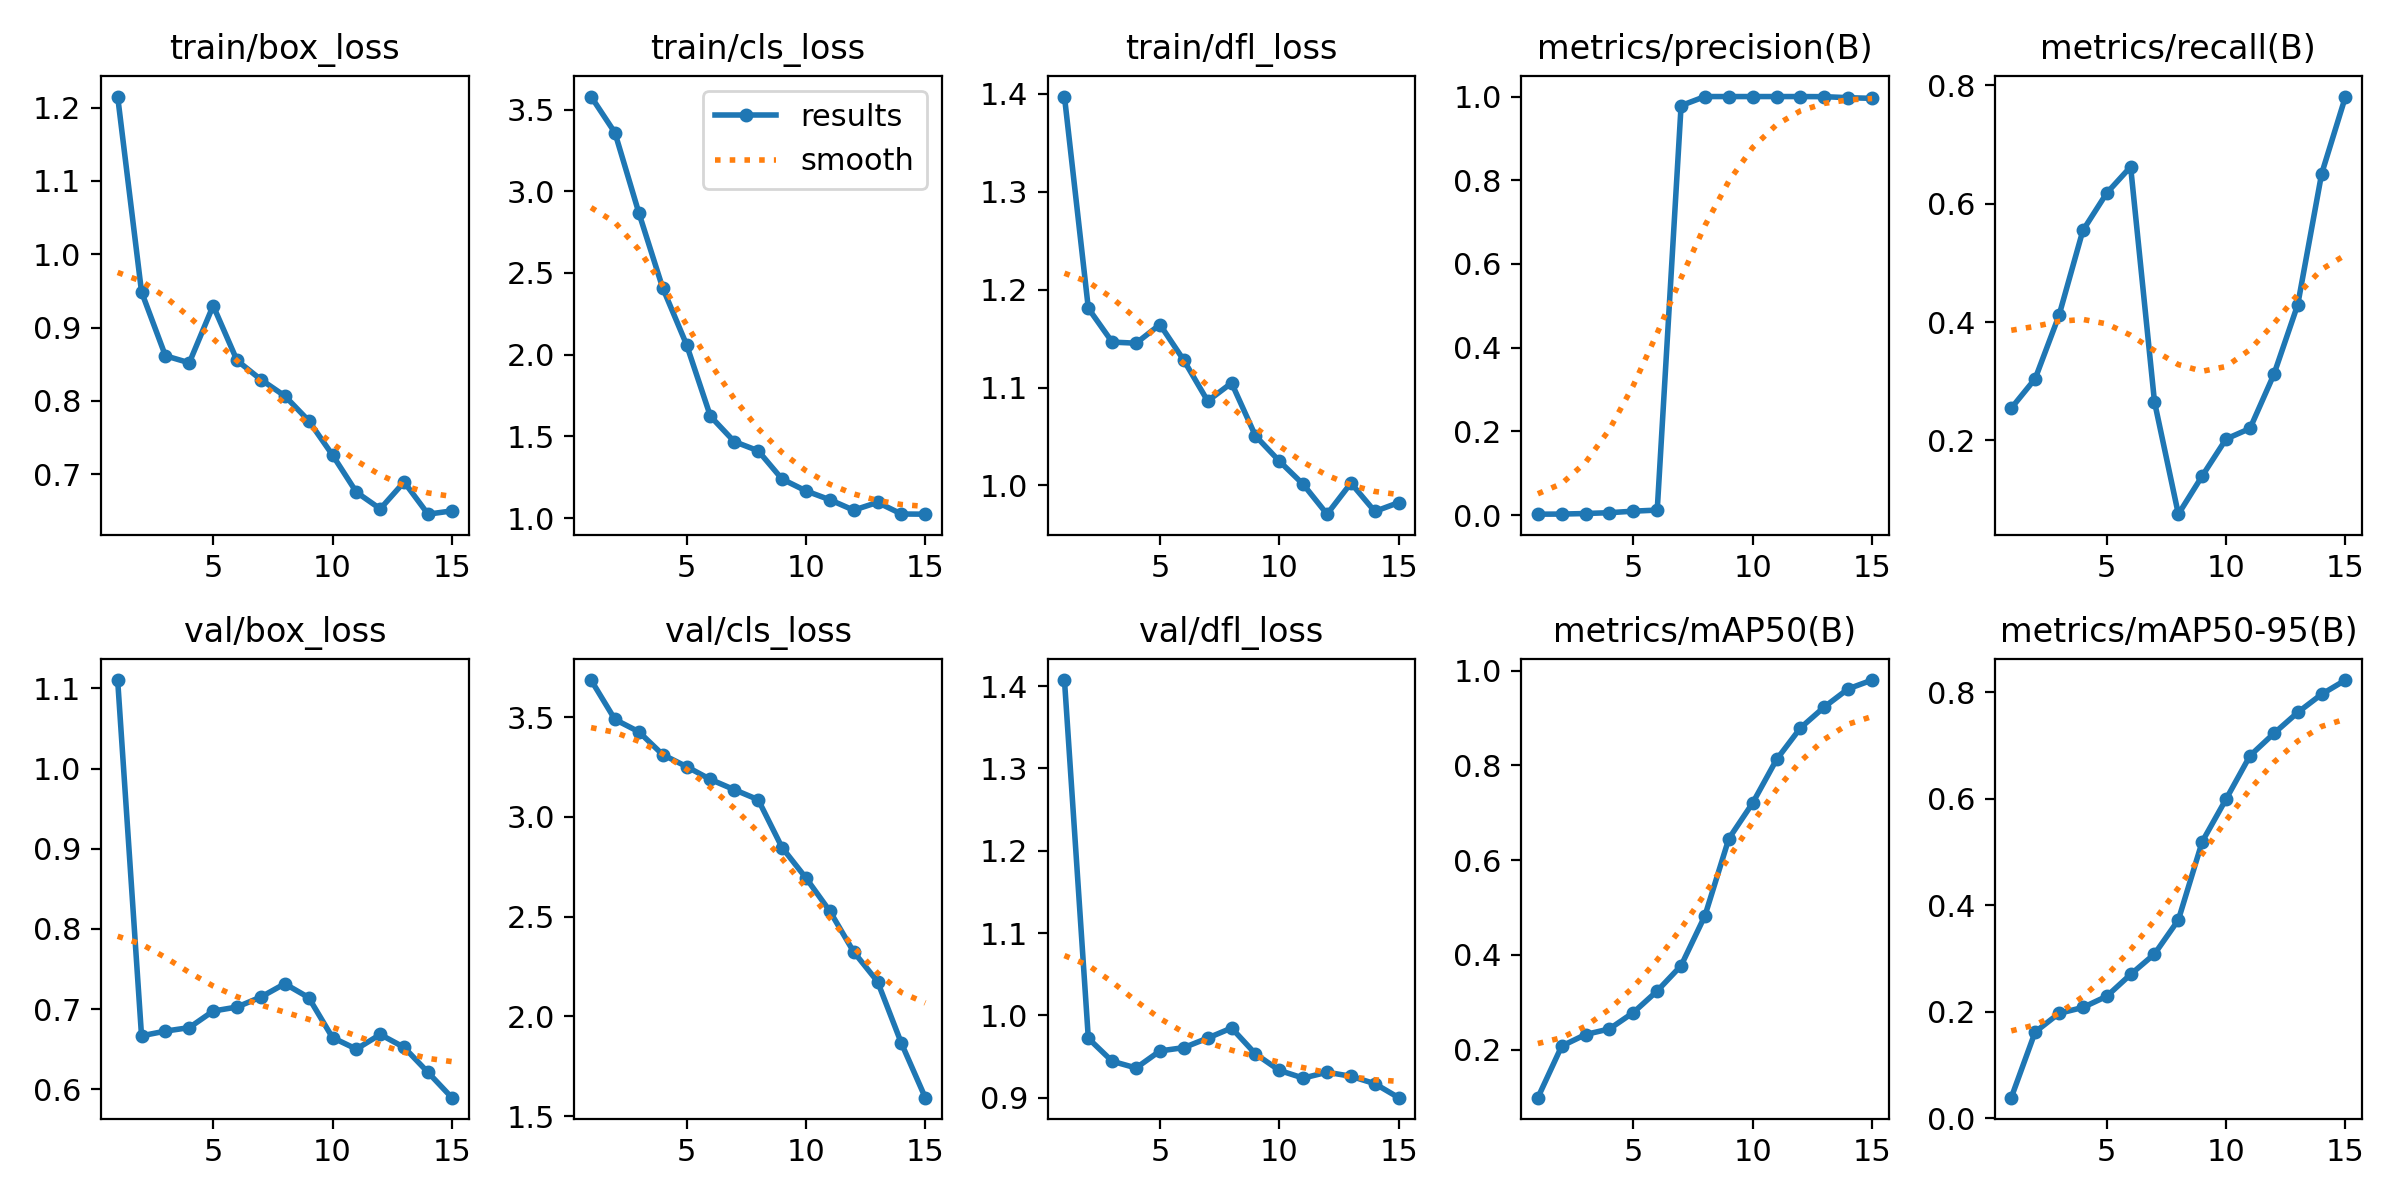


--- 🧩 Confusion Matrix (Where it gets confused) ---


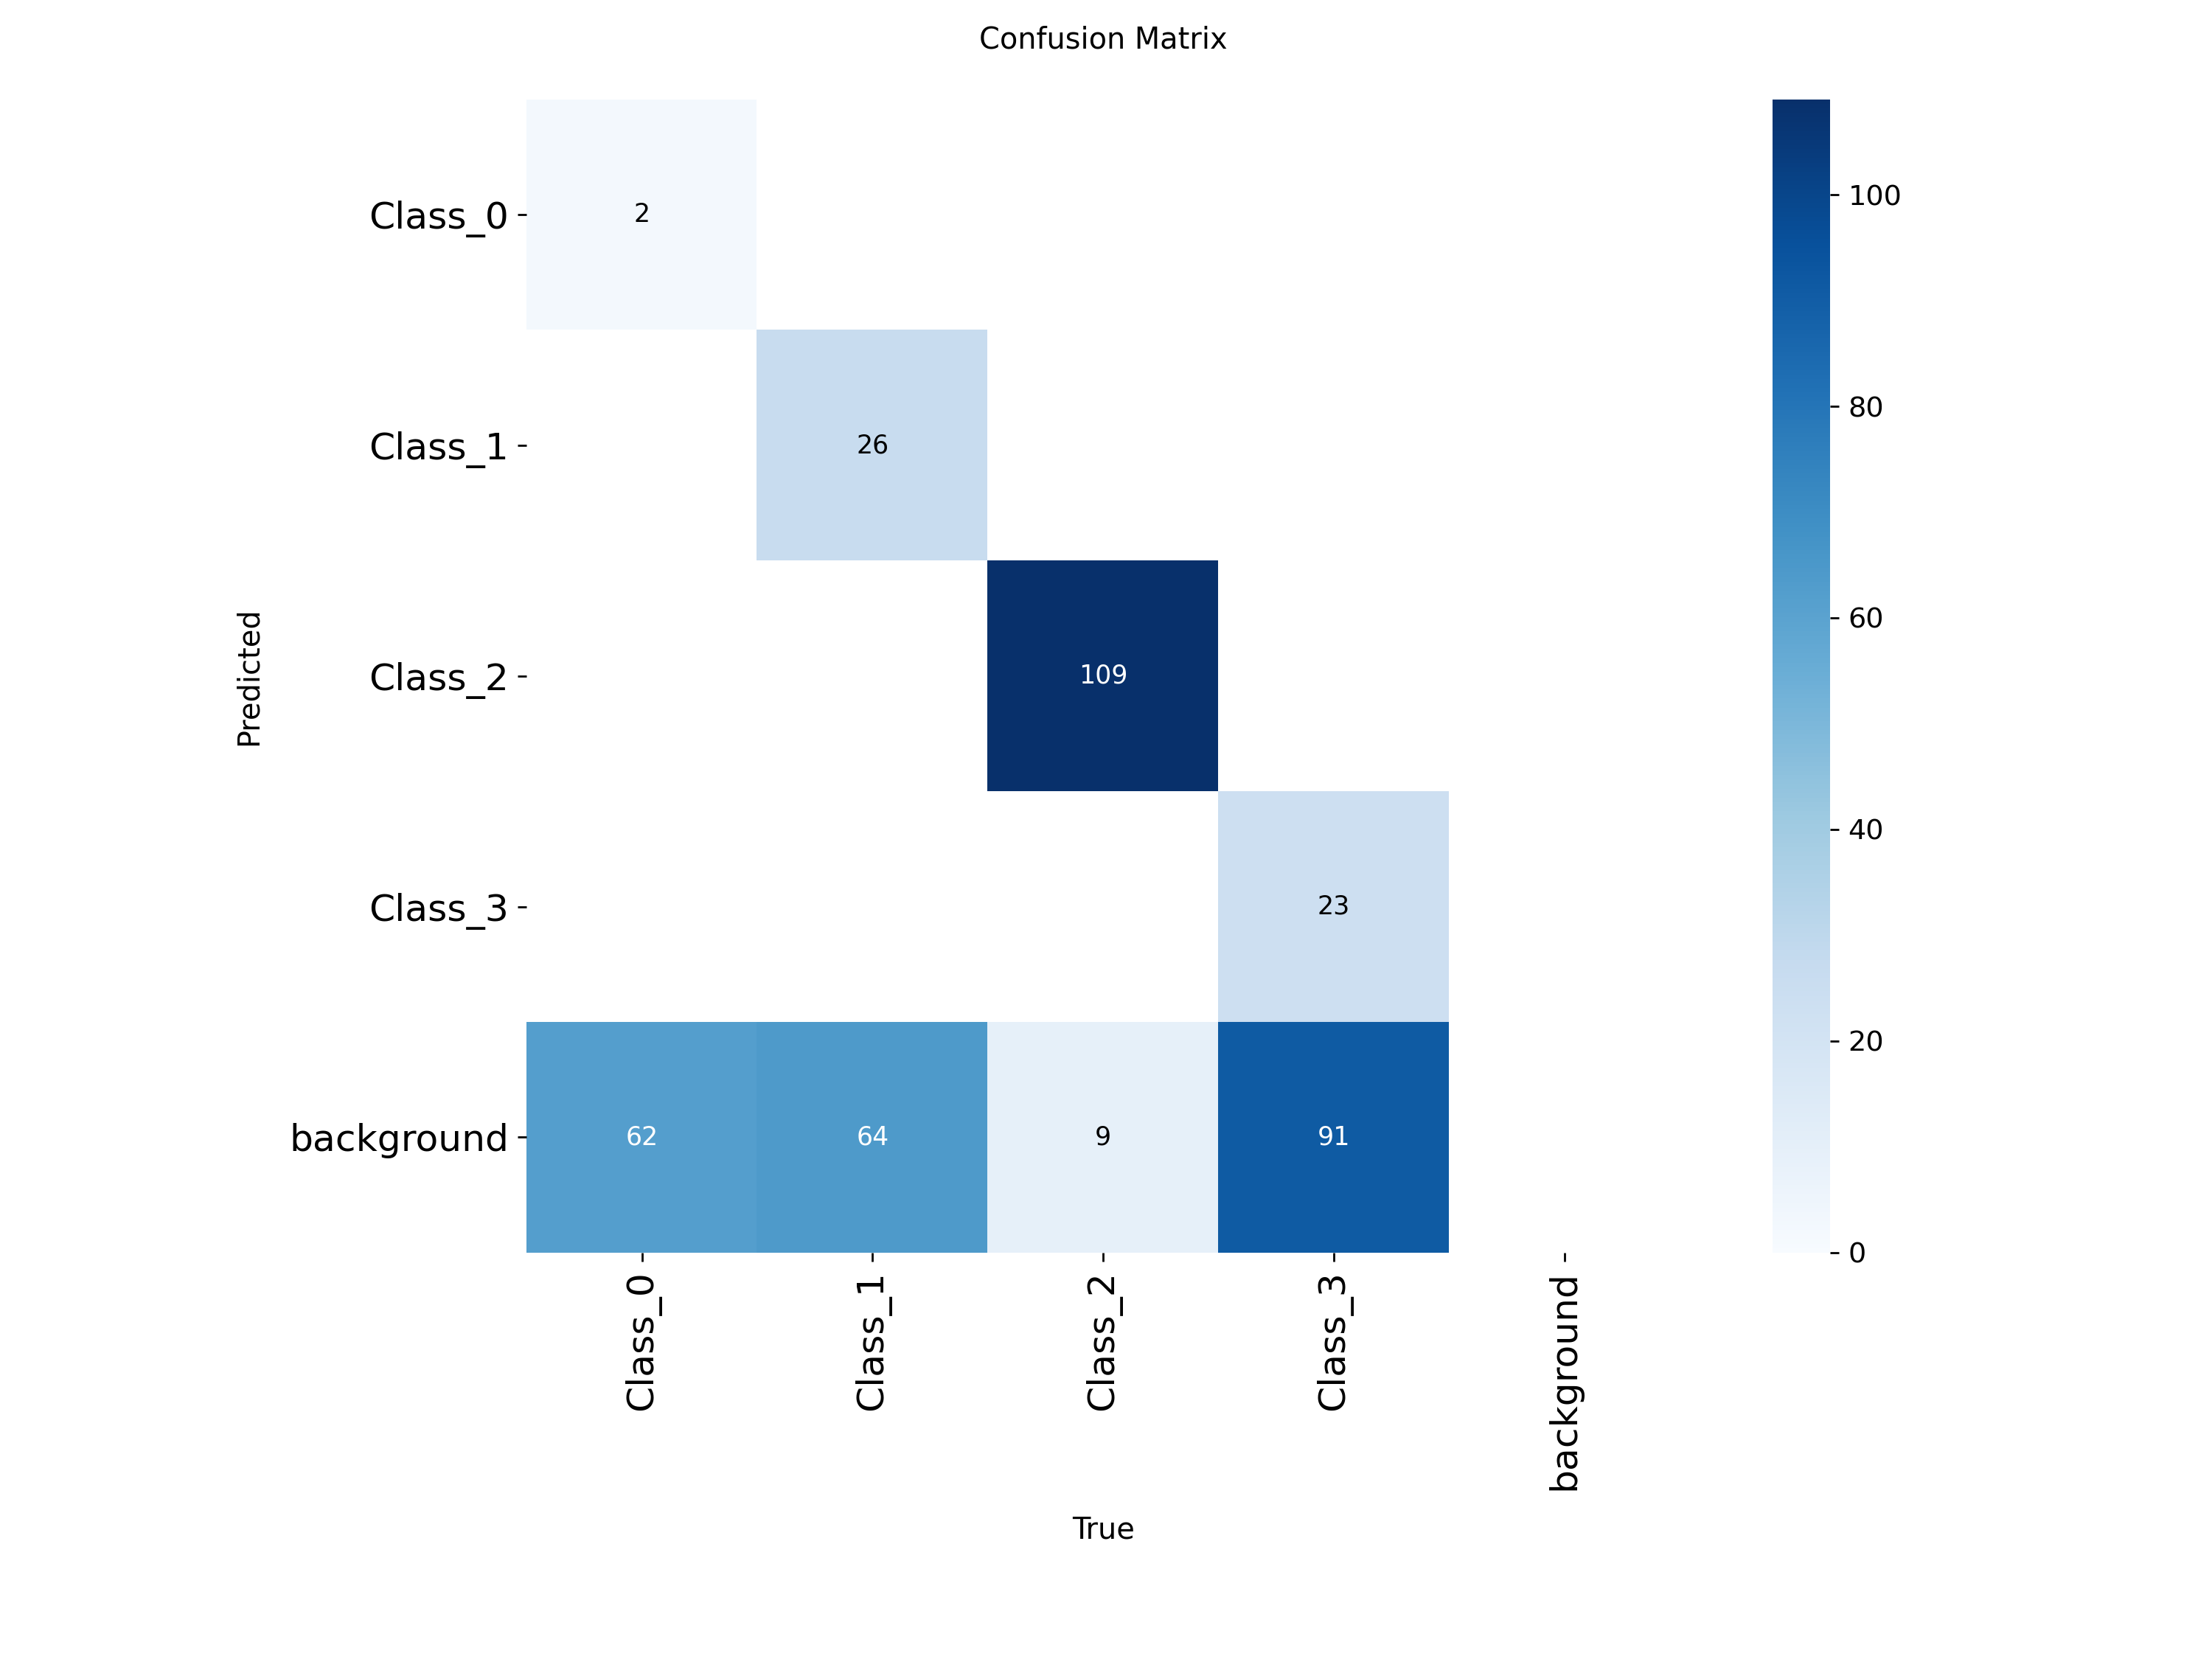

In [21]:
from IPython.display import Image, display

# Path to your training results
# (Make sure this matches your final run folder)
results_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/results.png'
confusion_matrix_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/confusion_matrix.png'

print("--- 📊 Accuracy Metrics (mAP) ---")
display(Image(filename=results_path))

print("\n--- 🧩 Confusion Matrix (Where it gets confused) ---")
# This shows how often it mistakes a Helmet for a No-Helmet
try:
    display(Image(filename=confusion_matrix_path))
except:
    print("Confusion matrix not found (requires validation run).")

In [22]:
import os

print("📂 Current Directory Contents:")
print(os.listdir('/kaggle/working/'))

📂 Current Directory Contents:
['data_new.yaml', 'yolo26n.pt', 'runs', 'yolo11n.pt', 'data.yaml', '.virtual_documents']


In [23]:
import cv2
from ultralytics import YOLO
import easyocr
import os

# --- PATHS ---
# We use the video we just downloaded in Step 1
video_path = '/kaggle/working/test_video.mp4' 
output_path = '/kaggle/working/Final_Demo_Output.mp4'
model_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'

# IDs (From your previous findings)
VIOLATION_ID = 2
PLATE_ID = 3

# 1. Initialize
if not os.path.exists(video_path):
    print("❌ Error: Run Step 1 first to download the video!")
else:
    print(f"📂 Processing video: {video_path}")
    model = YOLO(model_path)
    reader = easyocr.Reader(['en'])
    cap = cv2.VideoCapture(video_path)
    
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Setup Output
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    frame_count = 0
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        # Inference
        results = model.predict(frame, conf=0.4, verbose=False)
        result = results[0]
        annotated_frame = result.plot()
        
        # (Optional) Add 'Plate' text if found
        for box in result.boxes:
            if int(box.cls[0]) == PLATE_ID:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.putText(annotated_frame, "PLATE DETECTED", (x1, y1-10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
        
        out.write(annotated_frame)
        frame_count += 1
        if frame_count % 10 == 0:
            print(f"Processing frame {frame_count}...", end='\r')

    cap.release()
    out.release()
    print(f"\n✅ Done! Saved {frame_count} frames.")
    
    # Convert for Browser Viewing
    print("🔄 Converting to H.264 for browser...")
    os.system(f"ffmpeg -y -i {output_path} -vcodec libx264 /kaggle/working/Final_Browser_Video.mp4")
    
    # Display
    from IPython.display import Video
    display(Video("/kaggle/working/Final_Browser_Video.mp4", embed=True, width=800))

❌ Error: Run Step 1 first to download the video!


In [ ]:
# Try downloading a different, popular traffic video
!yt-dlp "https://www.youtube.com/watch?v=MNn9qKG2UFI" -o "test_video.mp4" --force-overwrites

import os
if os.path.exists('test_video.mp4'):
    print("✅ Success! Video saved as 'test_video.mp4'")
else:
    print("❌ YouTube download failed. Please use Solution 1 (Add Input).")

In [ ]:
import cv2
import os
import glob

# --- 1. Smart Image Search ---
# We look for images RECURSIVELY (**) inside the input folder
dataset_root = '/kaggle/input/rider-with-helmet-without-helmet-number-plate'
extensions = ['*.jpg', '*.jpeg', '*.png']
image_files = []

print("🔍 Searching for images...")
for ext in extensions:
    # Look in all subfolders
    found = glob.glob(os.path.join(dataset_root, '**', ext), recursive=True)
    image_files.extend(found)

# Sort them to keep order and take the first 30
image_files = sorted(image_files)[:30]

if len(image_files) == 0:
    print("❌ CRITICAL ERROR: No images found! Please check if your dataset is attached.")
    print(f"   Scanned path: {dataset_root}")
else:
    print(f"✅ Found {len(image_files)} images. Creating 'Simulation.mp4'...")

    # --- 2. Create the Video ---
    video_name = 'Simulation.mp4'
    frame_size = (640, 640) 
    fps = 1 # 1 frame per second
    
    # Initialize Video Writer
    out = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), fps, frame_size)

    count = 0
    for img_path in image_files:
        img = cv2.imread(img_path)
        
        if img is not None:
            # Resize to fit the video frame
            img_resized = cv2.resize(img, frame_size)
            out.write(img_resized)
            count += 1
        else:
            print(f"⚠️ Could not read image: {img_path}")

    out.release()
    
    if count > 0:
        print(f"🎉 Success! saved {count} frames to '{video_name}'")
        print("👉 Now you can proceed to Code 2 (Detection).")
    else:
        print("❌ Error: Video writer failed to save any frames.")

In [ ]:
import cv2
from ultralytics import YOLO
import easyocr
import os

# --- PATHS ---
video_path = 'Simulation.mp4'  # The video we just made
model_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'
output_path = 'Final_Project_Demo.mp4'

# IDs (Based on your training)
VIOLATION_ID = 2
PLATE_ID = 3

print("🚀 Starting AI Detection on Simulation Video...")

# Initialize
model = YOLO(model_path)
reader = easyocr.Reader(['en'])
cap = cv2.VideoCapture(video_path)

# Video Properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

frame_count = 0

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break
        
    # 1. Run YOLO
    results = model.predict(frame, conf=0.4, verbose=False)
    result = results[0]
    annotated_frame = result.plot() # Draw boxes
    
    # 2. Check for Violations & Read Plate
    for box in result.boxes:
        cls_id = int(box.cls[0])
        
        if cls_id == VIOLATION_ID:
            # Violation found! Look for a plate in this frame
            plate_text = ""
            
            for p_box in result.boxes:
                if int(p_box.cls[0]) == PLATE_ID:
                    x1, y1, x2, y2 = map(int, p_box.xyxy[0])
                    
                    # Crop & Preprocess
                    plate_crop = frame[y1:y2, x1:x2]
                    try:
                        gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
                        # Upscale for better reading
                        gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
                        
                        ocr_out = reader.readtext(gray, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                        if ocr_out:
                            plate_text = ocr_out[0][1]
                            # Draw Plate Text on Screen
                            cv2.putText(annotated_frame, f"PLATE: {plate_text}", (x1, y1-10), 
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                    except:
                        pass

    out.write(annotated_frame)
    frame_count += 1
    print(f"Processed Frame {frame_count}...", end='\r')

cap.release()
out.release()
print(f"\n\n✅ DONE! Download '{output_path}' from the Output folder.")

# 3. Convert for Browser Playback
os.system(f"ffmpeg -y -i {output_path} -vcodec libx264 Final_Browser_Preview.mp4")
from IPython.display import Video
display(Video("Final_Browser_Preview.mp4", embed=True, width=800))

In [ ]:
import requests
import os

# Pexels Video (Heavy Bike Traffic)
url = "https://videos.pexels.com/video-files/854671/854671-hd_1280_720_25fps.mp4"
output_file = "real_traffic.mp4"

print(f"⬇️ Downloading with browser headers...")

# 1. Setup Headers to mimic Chrome
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Referer": "https://www.pexels.com/"
}

# 2. Stream the download
try:
    with requests.get(url, stream=True, headers=headers) as r:
        r.raise_for_status()
        with open(output_file, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    
    file_size = os.path.getsize(output_file) / (1024 * 1024)
    print(f"✅ Success! Downloaded '{output_file}' ({file_size:.2f} MB)")
    print("👉 Now re-run the 'Detection on Real Video' code.")

except Exception as e:
    print(f"❌ Download failed: {e}")

In [ ]:
input_video = '/kaggle/input/YOUR_NEW_DATASET/video.mp4'

In [ ]:
import cv2
from ultralytics import YOLO
import easyocr
import os

# --- 1. CONFIGURATION ---
# Your uploaded video path
input_video = '/kaggle/input/video1/WhatsApp Video 2026-01-31 at 22.07.08.mp4'

# Output filename (Simple name to avoid errors)
output_video = 'My_Result.mp4'

# Your trained model
model_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'

# Class IDs (Based on your training)
VIOLATION_ID = 2  # No Helmet
PLATE_ID = 3      # Number Plate

# --- 2. VALIDATION ---
if not os.path.exists(input_video):
    print(f"❌ Error: Could not find video at: {input_video}")
    print("👉 Check if the folder name 'video1' is correct in the Right Sidebar.")
else:
    print(f"🚀 Found video! Processing: {input_video}")

    # --- 3. INITIALIZE ---
    model = YOLO(model_path)
    reader = easyocr.Reader(['en'])
    cap = cv2.VideoCapture(input_video)

    # Video Properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Create Writer
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    frame_count = 0
    
    print("🎥 Processing frames... (Please wait)")

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
            
        # Run YOLO (Low confidence to catch everything)
        results = model.predict(frame, conf=0.25, verbose=False)
        result = results[0]
        
        # Draw all detections first (so you see what the model sees)
        annotated_frame = result.plot()
        
        # Custom Logic: Find Violations & Read Plates
        for box in result.boxes:
            cls_id = int(box.cls[0])
            
            # If No Helmet (Class 2)
            if cls_id == VIOLATION_ID:
                # 1. Draw a thick red box
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 0, 255), 4)
                
                # 2. Look for any plate in this frame
                for p_box in result.boxes:
                    if int(p_box.cls[0]) == PLATE_ID:
                        px1, py1, px2, py2 = map(int, p_box.xyxy[0])
                        
                        # Crop & Read Plate
                        plate_crop = frame[py1:py2, px1:px2]
                        try:
                            # Preprocess: Grayscale + Upscale
                            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
                            gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
                            
                            # Read Text
                            ocr_out = reader.readtext(gray, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                            if ocr_out:
                                text = ocr_out[0][1]
                                # Draw Green Text
                                cv2.putText(annotated_frame, f"PLATE: {text}", (px1, py1-10), 
                                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                        except:
                            pass

        out.write(annotated_frame)
        frame_count += 1
        if frame_count % 10 == 0:
            print(f"Processed {frame_count} frames...", end='\r')

    cap.release()
    out.release()
    print(f"\n✅ DONE! Video saved as '{output_video}'")

    # --- 4. PLAY IN BROWSER ---
    print("🔄 Converting for browser playback...")
    # We use the simple output name to avoid space issues in FFmpeg
    os.system(f"ffmpeg -y -i {output_video} -vcodec libx264 Browser_Video.mp4")
    
    from IPython.display import Video
    display(Video("Browser_Video.mp4", embed=True, width=800))

In [ ]:
import cv2
from ultralytics import YOLO
import easyocr
import os
import glob

# --- 1. AUTO-LOCATE THE VIDEO ---
# Search for any .webm file in the helmet folder
search_path = '/kaggle/input/helmet'
video_files = glob.glob(os.path.join(search_path, '**', '*.webm'), recursive=True)

if not video_files:
    # Try searching for mp4 just in case
    video_files = glob.glob(os.path.join(search_path, '**', '*.mp4'), recursive=True)

if not video_files:
    print(f"❌ Error: No video files (.webm or .mp4) found in {search_path}")
    print("👉 Please check the dataset name in the Right Sidebar.")
else:
    input_video = video_files[0] # Take the first video found
    print(f"🚀 Found video! Processing: {input_video}")

    # --- 2. CONFIGURATION ---
    output_video = 'Helmet_Detection_Result.mp4'
    model_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'

    # IDs (Based on your training)
    VIOLATION_ID = 2  # No Helmet
    PLATE_ID = 3      # Number Plate

    # --- 3. INITIALIZE ---
    model = YOLO(model_path)
    reader = easyocr.Reader(['en'])
    cap = cv2.VideoCapture(input_video)

    # Video Properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Safety check for FPS (WebM sometimes returns 0 or huge numbers)
    if fps == 0 or fps > 60:
        fps = 25 

    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    frame_count = 0
    print("🎥 Processing frames... (This might take a minute)")

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
            
        # Run YOLO
        # conf=0.25 is balanced. Lower it to 0.15 if boxes are missing.
        results = model.predict(frame, conf=0.25, verbose=False)
        result = results[0]
        
        annotated_frame = result.plot()
        
        # Check for Violations
        for box in result.boxes:
            cls_id = int(box.cls[0])
            
            # If No Helmet (Class 2)
            if cls_id == VIOLATION_ID:
                # 1. Draw Red Box
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 0, 255), 4)
                
                # 2. Find Plate
                for p_box in result.boxes:
                    if int(p_box.cls[0]) == PLATE_ID:
                        px1, py1, px2, py2 = map(int, p_box.xyxy[0])
                        
                        # Crop & Read
                        plate_crop = frame[py1:py2, px1:px2]
                        try:
                            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
                            gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
                            
                            ocr_out = reader.readtext(gray, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                            if ocr_out:
                                text = ocr_out[0][1]
                                cv2.putText(annotated_frame, f"PLATE: {text}", (px1, py1-10), 
                                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                        except:
                            pass

        out.write(annotated_frame)
        frame_count += 1
        if frame_count % 10 == 0:
            print(f"Processed {frame_count} frames...", end='\r')

    cap.release()
    out.release()
    print(f"\n✅ DONE! Video saved as '{output_video}'")

    # --- 4. PLAY IN BROWSER ---
    print("🔄 Converting for browser playback...")
    os.system(f"ffmpeg -y -i {output_video} -vcodec libx264 Browser_Result.mp4")
    
    from IPython.display import Video
    display(Video("Browser_Result.mp4", embed=True, width=800))

In [ ]:
import cv2
from ultralytics import YOLO
import easyocr
import os
import glob

# --- 1. AUTO-LOCATE THE VIDEO ---
# Search for video files in the new folder
search_path = '/kaggle/input/hhell1'
video_files = glob.glob(os.path.join(search_path, '**', '*.webm'), recursive=True)

# If no webm, look for mp4
if not video_files:
    video_files = glob.glob(os.path.join(search_path, '**', '*.mp4'), recursive=True)

if not video_files:
    print(f"❌ Error: No video files found in {search_path}")
    print("👉 Please check if the dataset is attached correctly in the Right Sidebar.")
else:
    input_video = video_files[0] # Take the first video found
    print(f"🚀 Found video! Processing: {input_video}")

    # --- 2. CONFIGURATION ---
    output_video = 'Helmet_Result_New.mp4'
    model_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'

    # IDs (Based on your training)
    VIOLATION_ID = 2  # No Helmet
    PLATE_ID = 3      # Number Plate

    # --- 3. INITIALIZE ---
    model = YOLO(model_path)
    reader = easyocr.Reader(['en'])
    cap = cv2.VideoCapture(input_video)

    # Video Properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Safety check for invalid FPS (common in webm files)
    if fps <= 0 or fps > 60:
        fps = 25 

    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    frame_count = 0
    print("🎥 Processing frames... (This might take a minute)")

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
            
        # Run YOLO 
        # Using conf=0.25 to catch smaller/faster objects
        results = model.predict(frame, conf=0.25, verbose=False)
        result = results[0]
        
        annotated_frame = result.plot()
        
        # Check for Violations
        for box in result.boxes:
            cls_id = int(box.cls[0])
            
            # If No Helmet (Class 2)
            if cls_id == VIOLATION_ID:
                # 1. Draw Red Box
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 0, 255), 4)
                
                # 2. Find Plate
                for p_box in result.boxes:
                    if int(p_box.cls[0]) == PLATE_ID:
                        px1, py1, px2, py2 = map(int, p_box.xyxy[0])
                        
                        # Crop & Read
                        plate_crop = frame[py1:py2, px1:px2]
                        try:
                            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
                            gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
                            
                            ocr_out = reader.readtext(gray, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                            if ocr_out:
                                text = ocr_out[0][1]
                                cv2.putText(annotated_frame, f"PLATE: {text}", (px1, py1-10), 
                                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                        except:
                            pass

        out.write(annotated_frame)
        frame_count += 1
        if frame_count % 10 == 0:
            print(f"Processed {frame_count} frames...", end='\r')

    cap.release()
    out.release()
    print(f"\n✅ DONE! Video saved as '{output_video}'")

    # --- 4. PLAY IN BROWSER ---
    print("🔄 Converting for browser playback...")
    os.system(f"ffmpeg -y -i {output_video} -vcodec libx264 Browser_Result_New.mp4")
    
    from IPython.display import Video
    display(Video("Browser_Result_New.mp4", embed=True, width=800))

In [ ]:
import cv2
from ultralytics import YOLO
import easyocr
import os
import glob

# --- 1. AUTO-LOCATE THE VIDEO ---
# Search for video files in the new folder
search_path = '/kaggle/input/one-plus-1'
# Look for common video formats
video_files = glob.glob(os.path.join(search_path, '**', '*.mp4'), recursive=True)
if not video_files:
    video_files = glob.glob(os.path.join(search_path, '**', '*.webm'), recursive=True)
if not video_files:
    video_files = glob.glob(os.path.join(search_path, '**', '*.mov'), recursive=True)

if not video_files:
    print(f"❌ Error: No video files found in {search_path}")
    print("👉 Please check if the dataset is attached correctly in the Right Sidebar.")
else:
    input_video = video_files[0] # Take the first video found
    print(f"🚀 Found video! Processing: {input_video}")

    # --- 2. CONFIGURATION ---
    output_video = 'Helmet_Result_OnePlus.mp4'
    model_path = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'

    # IDs (Based on your training)
    VIOLATION_ID = 2  # No Helmet
    PLATE_ID = 3      # Number Plate

    # --- 3. INITIALIZE ---
    model = YOLO(model_path)
    reader = easyocr.Reader(['en'])
    cap = cv2.VideoCapture(input_video)

    # Video Properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Safety check for invalid FPS
    if fps <= 0 or fps > 60:
        fps = 25 

    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    frame_count = 0
    print("🎥 Processing frames... (This might take a minute)")

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
            
        # Run YOLO 
        results = model.predict(frame, conf=0.25, verbose=False)
        result = results[0]
        
        annotated_frame = result.plot()
        
        # Check for Violations
        for box in result.boxes:
            cls_id = int(box.cls[0])
            
            # If No Helmet (Class 2)
            if cls_id == VIOLATION_ID:
                # 1. Draw Red Box
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 0, 255), 4)
                
                # 2. Find Plate
                for p_box in result.boxes:
                    if int(p_box.cls[0]) == PLATE_ID:
                        px1, py1, px2, py2 = map(int, p_box.xyxy[0])
                        
                        # Crop & Read
                        plate_crop = frame[py1:py2, px1:px2]
                        try:
                            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
                            gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
                            
                            ocr_out = reader.readtext(gray, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                            if ocr_out:
                                text = ocr_out[0][1]
                                cv2.putText(annotated_frame, f"PLATE: {text}", (px1, py1-10), 
                                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                        except:
                            pass

        out.write(annotated_frame)
        frame_count += 1
        if frame_count % 10 == 0:
            print(f"Processed {frame_count} frames...", end='\r')

    cap.release()
    out.release()
    print(f"\n✅ DONE! Video saved as '{output_video}'")

    # --- 4. PLAY IN BROWSER ---
    print("🔄 Converting for browser playback...")
    os.system(f"ffmpeg -y -i {output_video} -vcodec libx264 Browser_Result_OnePlus.mp4")
    
    from IPython.display import Video
    display(Video("Browser_Result_OnePlus.mp4", embed=True, width=800))

In [24]:
!pip install streamlit -q
!npm install localtunnel -g

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 61.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.6 MB/s eta 0:00:00:00:0100:01
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
added 22 packages in 2s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼npm notice
npm notice New major version of npm available! 10.8.2 -> 11.8.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.8.0
npm notice To update run: npm install -g npm@11.8.0
npm notice
⠼

In [ ]:
%%writefile app.py
import streamlit as st
import cv2
import tempfile
import os
from ultralytics import YOLO
import easyocr
import numpy as np

# --- 1. SETUP & CONFIG ---
st.set_page_config(page_title="Helmet Guard AI", page_icon="🏍️")

st.title("🏍️ AI Traffic Cop: Helmet Detection System")
st.markdown("""
**Upload a traffic video**, and this AI will:
1. Detect riders without helmets (🔴 Red Box).
2. Capture their license plates (🟢 Green Text).
""")

# Path to your best trained model (adjust if needed)
MODEL_PATH = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'

# --- 2. LOAD MODEL ---
@st.cache_resource
def load_model():
    return YOLO(MODEL_PATH)

try:
    model = load_model()
    reader = easyocr.Reader(['en'], gpu=True)
    st.success("✅ Model Loaded Successfully!")
except Exception as e:
    st.error(f"❌ Error loading model: {e}")
    st.stop()

# --- 3. HELPER FUNCTION TO PROCESS VIDEO ---
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Define Output Path
    output_path = "output_detected.mp4"
    
    # We use 'avc1' (H.264) which works better in web browsers than 'mp4v'
    fourcc = cv2.VideoWriter_fourcc(*'avc1') 
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Progress Bar
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    progress_bar = st.progress(0)
    status_text = st.empty()
    
    frame_count = 0
    
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
            
        # Run Detection
        results = model.predict(frame, conf=0.25, verbose=False)
        result = results[0]
        annotated_frame = result.plot()
        
        # Check for Violations (Class 2 = No Helmet)
        violation_found = False
        for box in result.boxes:
            if int(box.cls[0]) == 2:
                violation_found = True
                
        # If violation, look for plate (Class 3)
        if violation_found:
            for box in result.boxes:
                if int(box.cls[0]) == 3:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    
                    # Crop & Read
                    plate_crop = frame[y1:y2, x1:x2]
                    try:
                        gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
                        gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
                        
                        ocr_out = reader.readtext(gray, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                        if ocr_out:
                            text = ocr_out[0][1]
                            cv2.putText(annotated_frame, f"PLATE: {text}", (x1, y1-10), 
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                    except:
                        pass

        out.write(annotated_frame)
        frame_count += 1
        
        # Update UI every 10 frames
        if frame_count % 10 == 0:
            progress = min(frame_count / total_frames, 1.0)
            progress_bar.progress(progress)
            status_text.text(f"Processing Frame {frame_count}/{total_frames}...")

    cap.release()
    out.release()
    return output_path

# --- 4. MAIN UI ---
uploaded_file = st.file_uploader("Upload a Video (MP4/WebM)", type=['mp4', 'mov', 'avi', 'webm'])

if uploaded_file is not None:
    # Save uploaded file to temp
    tfile = tempfile.NamedTemporaryFile(delete=False) 
    tfile.write(uploaded_file.read())
    video_path = tfile.name
    
    st.video(video_path) # Show original
    
    if st.button("🚀 Start Detection"):
        with st.spinner("Analyzing traffic... Please wait."):
            try:
                out_video = process_video(video_path)
                st.success("Processing Complete!")
                
                # We need to re-encode with ffmpeg to ensure browser compatibility
                # because OpenCV's writer is sometimes tricky with web players
                os.system(f"ffmpeg -y -i {out_video} -vcodec libx264 final_browser_ready.mp4")
                
                st.header("🎯 Detection Results")
                st.video("final_browser_ready.mp4")
                
            except Exception as e:
                st.error(f"An error occurred: {e}")

In [ ]:
import subprocess
import time
import sys
import os
import re

# --- 1. SETUP & FIX DEPENDENCIES ---
print("🔧 Fixing dependencies for Cloud Environment...")
# We FORCE install the 'headless' version of OpenCV which doesn't need a screen
subprocess.run([sys.executable, "-m", "pip", "install", "opencv-python-headless", "pyngrok", "streamlit"], stdout=subprocess.DEVNULL)

# --- 2. CLEANUP ---
print("🧹 Cleaning up old processes...")
os.system("pkill -f streamlit")
os.system("pkill -f cloudflared")

# --- 3. START STREAMLIT (With Error Logging) ---
print("⏳ Starting Streamlit App (Logging to 'app_log.txt')...")

# Command to run the app
cmd = [sys.executable, "-m", "streamlit", "run", "app.py", "--server.headless=true", "--server.address=localhost"]

# Open a log file to capture errors
with open("app_log.txt", "w") as log_file:
    # Run in background
    streamlit_process = subprocess.Popen(cmd, stdout=log_file, stderr=log_file)

# --- 4. WAIT & VERIFY (The Critical Step) ---
print("🔍 Waiting for App to start...", end="")
app_ready = False

for i in range(30):  # Wait up to 30 seconds
    if streamlit_process.poll() is not None:
        print("\n❌ CRITICAL: Streamlit crashed immediately!")
        break
        
    try:
        # Check if server is responding on port 8501
        subprocess.check_output(["curl", "-s", "http://localhost:8501"])
        app_ready = True
        print(" ✅ App is Alive!")
        break
    except:
        time.sleep(1)
        if i % 5 == 0: print(".", end="")

# --- 5. RESULT ---
if not app_ready:
    print("\n\n❌ ERROR: App failed to start. Here is the REAL Error Log:")
    print("-----------------------------------------------------")
    try:
        with open("app_log.txt", "r") as f:
            print(f.read())
    except:
        print("Could not read log file.")
    print("-----------------------------------------------------")
    print("👉 Please copy the error message above and paste it here.")
else:
    # --- 6. START CLOUDFLARE TUNNEL ---
    # Only start the tunnel if the app is actually running!
    print("🚀 App is healthy! Starting Cloudflare Tunnel...")
    
    if not os.path.exists("cloudflared"):
        subprocess.run("wget -q -O cloudflared https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64", shell=True)
        subprocess.run("chmod +x cloudflared", shell=True)

    with open("cf_logs.txt", "w") as log_file:
        cf_process = subprocess.Popen(
            ["./cloudflared", "tunnel", "--url", "http://localhost:8501"],
            stdout=log_file,
            stderr=log_file
        )

    print("🔗 Generating Link...", end="")
    public_url = None
    for i in range(20):
        time.sleep(1)
        print(".", end="")
        try:
            with open("cf_logs.txt", "r") as f:
                logs = f.read()
                match = re.search(r"https://[a-zA-Z0-9-]+\.trycloudflare\.com", logs)
                if match:
                    public_url = match.group(0)
                    break
        except:
            pass

    if public_url:
        print("\n\n🎉 --------------------------------------------------")
        print(f"🚀 YOUR APP IS LIVE HERE: {public_url}")
        print("--------------------------------------------------\n")
        print("⚠️ Keep this cell running!")
        
        try:
            while True:
                time.sleep(1)
        except KeyboardInterrupt:
            print("\n🛑 Shutting down...")
            streamlit_process.terminate()
            cf_process.terminate()
    else:
        print("\n❌ Error: Could not get Cloudflare link. Check 'cf_logs.txt'.")

In [25]:
import cv2
from ultralytics import YOLO
import easyocr
import os
from IPython.display import Video, display

# --- LOAD MODELS ONCE ---
print("⏳ Loading AI Models... (This happens only once)")
# Adjust path if your model is in a different location
MODEL_PATH = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'
model = YOLO(MODEL_PATH)
reader = easyocr.Reader(['en'])
print("✅ Models Loaded!")

def detect_video(video_path):
    """
    Manually runs detection on a specific video file.
    """
    if not os.path.exists(video_path):
        print(f"❌ Error: File found at {video_path}")
        return

    print(f"🚀 Starting Detection on: {os.path.basename(video_path)}")
    
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Handle weird FPS in some webm files
    if fps <= 0 or fps > 60: fps = 25

    output_filename = "Result_" + os.path.basename(video_path)
    # Use MP4 codec
    output_path = output_filename.replace(".webm", ".mp4")
    
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    frame_count = 0
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
            
        # 1. AI PREDICTION
        results = model.predict(frame, conf=0.25, verbose=False)
        result = results[0]
        annotated_frame = result.plot() # Draws all basic boxes
        
        # 2. LOGIC CHECK
        violation_found = False
        for box in result.boxes:
            cls_id = int(box.cls[0])
            
            # If "No Helmet" (Class 2) -> VIOLATION
            if cls_id == 2:
                violation_found = True
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                # Draw THICK Red Box
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 0, 255), 4)
                cv2.putText(annotated_frame, "NO HELMET", (x1, y1-10), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

        # 3. NUMBER PLATE READER (Only if violation found)
        if violation_found:
            for box in result.boxes:
                if int(box.cls[0]) == 3: # Number Plate Class
                    px1, py1, px2, py2 = map(int, box.xyxy[0])
                    
                    # Crop the plate
                    plate_crop = frame[py1:py2, px1:px2]
                    try:
                        # Image Processing for better OCR
                        gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
                        gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
                        
                        # Read Text
                        ocr_out = reader.readtext(gray, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                        if ocr_out:
                            text = ocr_out[0][1]
                            # Draw Green Plate Text
                            cv2.putText(annotated_frame, f"PLATE: {text}", (px1, py1-10), 
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                    except:
                        pass

        out.write(annotated_frame)
        frame_count += 1
        if frame_count % 10 == 0:
            print(f"Processed {frame_count}/{total_frames} frames...", end='\r')

    cap.release()
    out.release()
    print(f"\n✅ Done! Saved as: {output_path}")
    
    # Convert for Browser Viewing
    browser_file = "Browser_" + output_path
    os.system(f"ffmpeg -y -i {output_path} -vcodec libx264 {browser_file} -hide_banner -loglevel error")
    
    display(Video(browser_file, embed=True, width=800))

⏳ Loading AI Models... (This happens only once)
✅ Models Loaded!


In [30]:
import cv2
from ultralytics import YOLO
import easyocr
import os
import glob
from IPython.display import Video, display

# --- LOAD MODELS ---
print("⏳ Loading AI Models...")
MODEL_PATH = '/kaggle/working/runs/detect/helmet_project/real_run_fixed/weights/best.pt'
model = YOLO(MODEL_PATH)
reader = easyocr.Reader(['en'])
print("✅ Models Ready!")

def smart_detect(path_input):
    # 1. INTELLIGENT PATH FINDING
    video_path = path_input
    
    # If the user gave a FOLDER, find the video file inside it
    if os.path.isdir(path_input):
        print(f"📂 You provided a folder: {path_input}")
        print("🔍 Searching for video files inside...")
        
        # Look for common video formats
        files = glob.glob(os.path.join(path_input, '**', '*.mp4'), recursive=True) + \
                glob.glob(os.path.join(path_input, '**', '*.webm'), recursive=True) + \
                glob.glob(os.path.join(path_input, '**', '*.mov'), recursive=True)
        
        if not files:
            print("❌ Error: No video files found in this folder!")
            return
        
        video_path = files[0] # Take the first one found
        print(f"👉 Found Video: {os.path.basename(video_path)}")

    if not os.path.exists(video_path):
        print("❌ Error: Path does not exist.")
        return

    # 2. SETUP OUTPUT
    print(f"🚀 Processing: {os.path.basename(video_path)}")
    cap = cv2.VideoCapture(video_path)
    
    # Fix properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    if fps <= 0 or fps > 60: fps = 25 # Fix weird FPS
    
    # Ensure output has a valid name and extension
    output_name = "Detected_" + os.path.splitext(os.path.basename(video_path))[0] + ".mp4"
    
    out = cv2.VideoWriter(output_name, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    # 3. RUN DETECTION
    frame_count = 0
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
            
        # A. Predict
        results = model.predict(frame, conf=0.25, verbose=False)
        result = results[0]
        annotated_frame = result.plot()
        
        # B. Check Logic
        violation_found = False
        for box in result.boxes:
            if int(box.cls[0]) == 2: # No Helmet
                violation_found = True
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 0, 255), 4)

        if violation_found:
            for box in result.boxes:
                if int(box.cls[0]) == 3: # Plate
                    px1, py1, px2, py2 = map(int, box.xyxy[0])
                    plate_crop = frame[py1:py2, px1:px2]
                    try:
                        gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
                        gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
                        ocr_out = reader.readtext(gray, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                        if ocr_out:
                            text = ocr_out[0][1]
                            cv2.putText(annotated_frame, f"PLATE: {text}", (px1, py1-10), 
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                    except:
                        pass

        out.write(annotated_frame)
        frame_count += 1
        if frame_count % 10 == 0:
            print(f"Processed {frame_count}/{total_frames} frames...", end='\r')

    cap.release()
    out.release()
    print(f"\n✅ Video Saved: {output_name}")
    
    # 4. CONVERT & DISPLAY
    print("🔄 Preparing for browser playback...")
    browser_file = "Browser_" + output_name
    os.system(f"ffmpeg -y -i {output_name} -vcodec libx264 {browser_file} -hide_banner -loglevel error")
    
    display(Video(browser_file, embed=True, width=800))

⏳ Loading AI Models...
✅ Models Ready!


In [32]:
smart_detect('/kaggle/input/one-plus-1')

📂 You provided a folder: /kaggle/input/one-plus-1
🔍 Searching for video files inside...
👉 Found Video: one1.webm
🚀 Processing: one1.webm
Processed 600/600 frames...
✅ Video Saved: Detected_one1.mp4
🔄 Preparing for browser playback...
